## Segmentation performance of nnU-Net vs. U-Net. 

Figure 3. Segmentation performance of nnU-Net vs. U-Net. A nnU-Net model and a U-Net model was evaluated for liver segmentation on all test CT images (n=615). Scatter plot presents the Spearman correlation between segmentation DSC and ground-truth attenuation. 

In [1]:
import pandas as pd

csv_path = '../csv/stats_csv_curated/Liver_seg_nnunet_vs_unet_n_615.csv'
df = pd.read_csv(csv_path)
print(df.shape)
df.head()
# unet0 is the 3D U-Net trained on NLST and then applied externally here, without any retraining.
# unet_own means the 3D U-Net retrained on the LIDC-IDRI dataset.

(615, 17)


,partition,data_set,CT_id,manual_select_roi,manual_hs,dsc_nn-unet,jc_nn-unet,assd_nn-unet,hd_nn-unet,dsc_unet0,jc_unet0,assd_unet0,hd_unet0,dsc_unet_own,jc_unet_own,assd_unet_own,hd_unet_own
0,External_test,covid_china,covid_0700,54.7063,0,0.94202,0.89039,1.48508,35.26032,0.95027,0.90526,1.44215,43.78504,0.93410,0.87635,1.65669,33.78417
1,External_test,covid_china,covid_0701,59.8407,0,0.95244,0.90921,1.05972,17.46854,0.96660,0.93536,0.74910,10.86692,0.95087,0.90635,1.08472,14.97665
2,External_test,covid_china,covid_0702,44.0310,0,0.94929,0.90348,1.10806,16.82914,0.94507,0.89586,1.29067,23.87195,0.93989,0.88660,1.46207,28.78541
3,External_test,covid_china,covid_0703,42.0273,0,0.94955,0.90395,1.34365,30.00000,0.95507,0.91401,1.15097,25.08625,0.93955,0.88600,1.41545,20.98690
4,External_test,covid_china,covid_0704,56.4772,0,0.95247,0.90925,0.99982,13.75282,0.96068,0.92433,0.93434,16.14683,0.94685,0.89907,1.17600,11.81228


In [2]:
col = list(df.columns)[2:]
print('col of data frame:',col,'\n\n\n')
data_set_list = sorted(list(set(df['data_set'].tolist())))
print('data_set_list',data_set_list)

col of data frame: ['CT_id', 'manual_select_roi', 'manual_hs', 'dsc_nn-unet', 'jc_nn-unet', 'assd_nn-unet', 'hd_nn-unet', 'dsc_unet0', 'jc_unet0', 'assd_unet0', 'hd_unet0', 'dsc_unet_own', 'jc_unet_own', 'assd_unet_own', 'hd_unet_own'] 



data_set_list ['LIDC_IDRI', 'LUNG1', 'RICORD-1A', 'RICORD-1B', 'RIDER', 'VESSEL12', 'covid_china', 'covid_italy']


In [3]:
metric_list = ['dsc', 'jc', 'assd', 'hd']
# metric_list = ['dsc']

In [4]:
from scipy.stats import ks_2samp
import numpy as np

col_str = 'dsc_nn-unet'
for metric_str in metric_list:
    col_str2 = metric_str + '_unet_own'
    col_str1 = metric_str + '_nn-unet'

    metric_value = df[df ['data_set']=='LIDC_IDRI'][col_str1]
    print(col_str1 , 'internal mean:::', round(np.mean(metric_value),3), 'std:::', round(np.std(metric_value),3)) 
    metric_value = df[df ['data_set']=='LIDC_IDRI'][col_str2]
    print(col_str2 , 'internal mean:::', round(np.mean(metric_value),3),'std ',round(np.std(metric_value),3))   
    
    metric_value = df[df ['data_set']!='LIDC_IDRI'][col_str1 ]
    print(col_str1, 'external mean:::', round(np.mean(metric_value),3), 'std:::',round(np.std(metric_value),3))  
    metric_value = df[df ['data_set']!='LIDC_IDRI'][col_str2]
    print(col_str2, 'external mean:::',round(np.mean(metric_value),3), 'std:::',round(np.std(metric_value),3), '\n\n\n')

dsc_nn-unet internal mean::: 0.977 std::: 0.008
dsc_unet_own internal mean::: 0.973 std  0.014
dsc_nn-unet external mean::: 0.965 std::: 0.02
dsc_unet_own external mean::: 0.94 std::: 0.055 



jc_nn-unet internal mean::: 0.954 std::: 0.015
jc_unet_own internal mean::: 0.947 std  0.026
jc_nn-unet external mean::: 0.932 std::: 0.034
jc_unet_own external mean::: 0.891 std::: 0.085 



assd_nn-unet internal mean::: 0.536 std::: 0.292
assd_unet_own internal mean::: 0.686 std  0.529
assd_nn-unet external mean::: 1.101 std::: 2.551
assd_unet_own external mean::: 1.781 std::: 3.029 



hd_nn-unet internal mean::: 13.049 std::: 8.027
hd_unet_own internal mean::: 16.76 std  10.719
hd_nn-unet external mean::: 19.967 std::: 34.473
hd_unet_own external mean::: 27.138 std::: 34.822 





In [5]:
df.head()

,partition,data_set,CT_id,manual_select_roi,manual_hs,dsc_nn-unet,jc_nn-unet,assd_nn-unet,hd_nn-unet,dsc_unet0,jc_unet0,assd_unet0,hd_unet0,dsc_unet_own,jc_unet_own,assd_unet_own,hd_unet_own
0,External_test,covid_china,covid_0700,54.7063,0,0.94202,0.89039,1.48508,35.26032,0.95027,0.90526,1.44215,43.78504,0.93410,0.87635,1.65669,33.78417
1,External_test,covid_china,covid_0701,59.8407,0,0.95244,0.90921,1.05972,17.46854,0.96660,0.93536,0.74910,10.86692,0.95087,0.90635,1.08472,14.97665
2,External_test,covid_china,covid_0702,44.0310,0,0.94929,0.90348,1.10806,16.82914,0.94507,0.89586,1.29067,23.87195,0.93989,0.88660,1.46207,28.78541
3,External_test,covid_china,covid_0703,42.0273,0,0.94955,0.90395,1.34365,30.00000,0.95507,0.91401,1.15097,25.08625,0.93955,0.88600,1.41545,20.98690
4,External_test,covid_china,covid_0704,56.4772,0,0.95247,0.90925,0.99982,13.75282,0.96068,0.92433,0.93434,16.14683,0.94685,0.89907,1.17600,11.81228


In [6]:
from sklearn import linear_model
from scipy import stats

[colgd, colai ]  = ['manual_select_roi','dsc_unet_own']
# [colgd, colai ]  = ['manual_select_roi','dsc_unet0']
[colgd, colai ]  = ['manual_select_roi','dsc_nn-unet']

x_ax = np.array(df[colgd])
y_ax = np.array(df[colai]) *100

sp_cor = stats.spearmanr(x_ax,y_ax)
print(colgd, colai , sp_cor)

model = linear_model.LinearRegression()
x_new = np.array(x_ax).reshape(-1, 1)
y_new = np.array(y_ax ).reshape(-1, 1)

model.fit(x_new, y_new )

print(colgd, colai , "slope ：", model.coef_)
print(colgd, colai , "interception：", model.intercept_)

manual_select_roi dsc_nn-unet SpearmanrResult(correlation=0.2926929577487723, pvalue=1.295883531522881e-13)
manual_select_roi dsc_nn-unet slope ： [[0.03072242]]
manual_select_roi dsc_nn-unet interception： [94.9744646]


<Figure size 1000x1000 with 0 Axes>

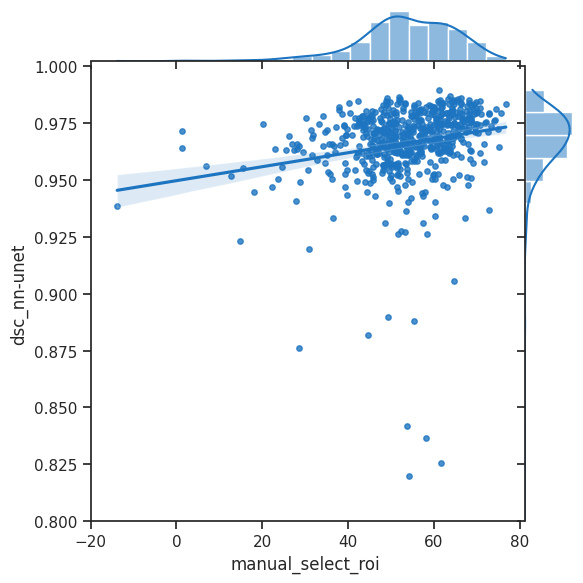

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
sns.set_style("ticks")
sns.despine()

x_min, x_max = -20, 80
y_min, y_max = 0.8, 1.0

ax = sns.jointplot(data=df, x=colgd, y=colai , color = '#1d74c0ff',
              marginal_kws = dict(bins= 20), space = 0.1,ratio = 8
              , xlim=[x_min, x_max], ylim=[y_min, y_max]
              , kind = 'reg'
                   , scatter_kws={'s': 15}
             )
ax.fig.set_size_inches(6,6)
# plt.savefig( 'joint_plot_' + colgd + '_' +colai +'.png', dpi = 500)

In [9]:
from sklearn import linear_model
from scipy import stats

[colgd, colai ]  = ['manual_select_roi','dsc_unet_own']
x_ax = np.array(df[colgd])
y_ax = np.array(df[colai]) *100

sp_cor = stats.spearmanr(x_ax,y_ax)
print(colgd, colai , sp_cor)

model = linear_model.LinearRegression()
x_new = np.array(x_ax).reshape(-1, 1)
y_new = np.array(y_ax ).reshape(-1, 1)

model.fit(x_new, y_new )

print(colgd, colai , "slope ：", model.coef_)
print(colgd, colai , "interception：", model.intercept_)

manual_select_roi dsc_unet_own SpearmanrResult(correlation=0.5250844376801372, pvalue=7.054591218826724e-45)
manual_select_roi dsc_unet_own slope ： [[0.20756783]]
manual_select_roi dsc_unet_own interception： [83.32430256]


<Figure size 1000x1000 with 0 Axes>

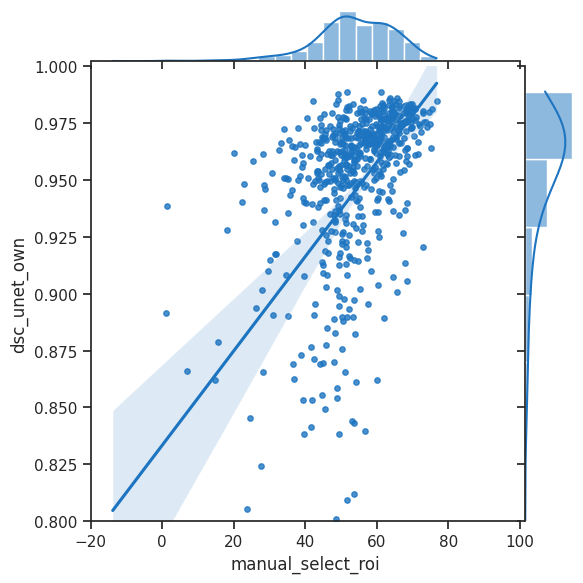

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
sns.set_style("ticks")
sns.despine()

x_min, x_max = -20, 100
y_min, y_max = 0.8, 1.0

ax = sns.jointplot(data=df, x=colgd, y=colai , color = '#1d74c0ff',
              marginal_kws = dict(bins= 20), space = 0.1,ratio = 8
              , xlim=[x_min, x_max], ylim=[y_min, y_max]
              , kind = 'reg'
                   , scatter_kws={'s': 15}
             )
ax.fig.set_size_inches(6,6)
# plt.savefig( 'joint_plot_' + col[0] + '_' +col[1] +'.png', dpi = 500)